# Points of Interest

### Finding all relevant points of interest in Columbus, OH to partner with in implementing electric vehicle charging station infrastructure

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
!ls

NS_data.ipynb          Points_of_Interest.csv README.md


In [159]:
# Points of Interest file - includes all popular areas in Columbus, OH
# Source: http://opendata.columbus.gov/datasets/86458e5d8a264dff9204518e109c0f93_10?geometry=-83.926%2C39.846%2C-82.168%2C40.214&page=7
df = pd.read_csv('Points_of_Interest.csv')

In [160]:
df.head()

,X,Y,OBJECTID,COLS_KEY,LSN,POI_NAME,POI_TYPE,POI_SOURCE,PRIMARY,ALT_GEOM,PHONE_NUM,GLOBALID,WEBSITE,OB_GYN,PEDIATRICS,PRIMARY_CARE
0,-83.112629,40.006321,5787325,626098.0,3750 ZANE TRACE DR,Pet Brands,Industrial - Warehouse,NaN,Yes,Yes,NaN,{2D626609-391A-4BB2-B33E-DEF58FD576EE},NaN,NaN,NaN,NaN
1,-83.059869,40.052299,5787326,586262.0,1520 OLD HENDERSON RD,The Breathing Association,Medical - Other,NaN,No,Yes,614-457-4570,{2397A8D6-753F-4D01-A40A-E1B5E940CD92},http://www.breathingassociation.org/,NaN,NaN,NaN
2,-82.978142,40.061762,5787327,811713.0,4661 KARL RD,Fresenius Kidney Care Central Ohio Dialysis,Medical - Other,NaN,Yes,Yes,6148400012,{24AF2DF8-3221-43B5-A611-7768F1EB201E},NaN,NaN,NaN,NaN
3,-82.994076,39.952413,5787328,233764.0,500 S 4TH ST 1,Advanced Auto Insurance Network,Office - Corporate,NaN,Yes,Yes,NaN,{61040209-31C6-4035-B835-80DAE70BB4BC},NaN,NaN,NaN,NaN
4,-83.012750,39.956807,5787329,589438.0,185 MCDOWELL ST,All American Welding,Retail - Services,NaN,Yes,Yes,NaN,{2B36E5A7-8F4B-464D-9D49-8E053AFB321C},NaN,NaN,NaN,NaN


In [161]:
#drop irrelevant columns
df = df.drop(['POI_SOURCE', 'WEBSITE', 'OB_GYN', 'PEDIATRICS', 'PRIMARY_CARE'], axis=1)
df.head()

,X,Y,OBJECTID,COLS_KEY,LSN,POI_NAME,POI_TYPE,PRIMARY,ALT_GEOM,PHONE_NUM,GLOBALID
0,-83.112629,40.006321,5787325,626098.0,3750 ZANE TRACE DR,Pet Brands,Industrial - Warehouse,Yes,Yes,NaN,{2D626609-391A-4BB2-B33E-DEF58FD576EE}
1,-83.059869,40.052299,5787326,586262.0,1520 OLD HENDERSON RD,The Breathing Association,Medical - Other,No,Yes,614-457-4570,{2397A8D6-753F-4D01-A40A-E1B5E940CD92}
2,-82.978142,40.061762,5787327,811713.0,4661 KARL RD,Fresenius Kidney Care Central Ohio Dialysis,Medical - Other,Yes,Yes,6148400012,{24AF2DF8-3221-43B5-A611-7768F1EB201E}
3,-82.994076,39.952413,5787328,233764.0,500 S 4TH ST 1,Advanced Auto Insurance Network,Office - Corporate,Yes,Yes,NaN,{61040209-31C6-4035-B835-80DAE70BB4BC}
4,-83.012750,39.956807,5787329,589438.0,185 MCDOWELL ST,All American Welding,Retail - Services,Yes,Yes,NaN,{2B36E5A7-8F4B-464D-9D49-8E053AFB321C}


In [162]:
df['POI_TYPE'].unique()

array(['Industrial - Warehouse', 'Medical - Other', 'Office - Corporate',
       'Retail - Services', 'Education - Elementary',
       'Industrial - Water Treatment Plant', 'Office - Non-Profit',
       'Retail - Commercial/Retail', 'Public Places - House of Worship',
       'Retail - Shopping Center-Neighborhood', 'Retail - Gas Station',
       'Retail - Restaurant', 'Retail - Shopping Center-Community',
       'Transportation - Parking Lot/Garage', 'Education - High',
       'Education - College/University', 'Group Quarters - Dormitory',
       "Medical - Women's Health", 'Medical - Physician',
       'Medical - Research/Laboratory', 'Transportation - Bus',
       'Medical - Dental', 'Medical - Veterinary',
       'Emergency Response - Police', 'Transportation - Other',
       'Public Places - Community/Recreation Center',
       'Retail - Specialty Food', 'Education - Other',
       'Retail - Fitness Center', 'Retail - Mixed Use',
       'Public Places - Arena/Stadium',
       'Medi

In [163]:
X_loc = df['X'] #longitude -> east/west
Y_loc = df['Y'] #latitude -> north/south

In [164]:
len(df) # of points of interest

14619

In [165]:
min(X_loc), max(X_loc)

(-83.20144920895963, -82.53664015486812)

In [166]:
min(Y_loc), max(Y_loc)

(39.72050603807074, 40.38405029613208)

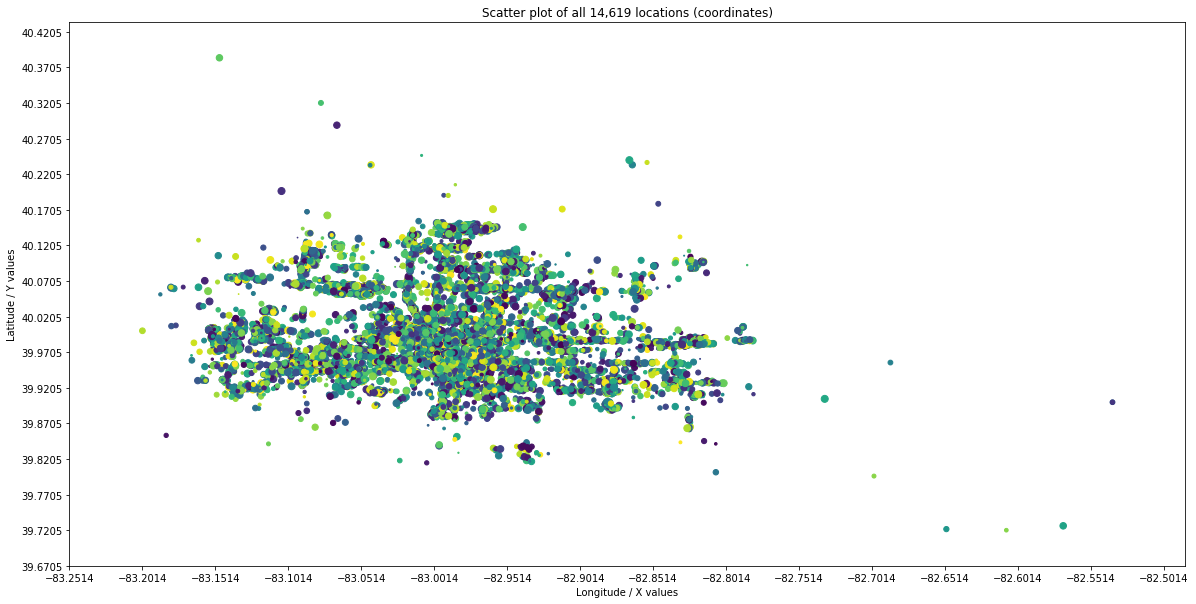

In [167]:
N = len(X_loc)
area = (50 * np.random.rand(N))

plt.figure(figsize=(20,10))
plt.title("Scatter plot of all 14,619 locations (coordinates)")
# plt.axis([-83.25, -82.5, 39.65, 40.45])

xi = np.arange(min(X_loc) - 0.05, max(X_loc) + 0.05, 0.05)
yi = np.arange(min(Y_loc) - 0.05, max(Y_loc) + 0.05, 0.05)

plt.xticks(xi)
plt.yticks(yi)
plt.xlim(min(X_loc) - 0.05, max(X_loc) + 0.05)
plt.ylim(min(Y_loc) - 0.05, max(Y_loc) + 0.05)

plt.xlabel("Longitude / X values")
plt.ylabel("Latitude / Y values")
plt.scatter(X_loc, Y_loc, s=area, c=np.random.rand(N))

In [168]:
len(df['POI_NAME'].unique())

12127

In [175]:
# filter by specific points of interest

df_offices = df[df['POI_TYPE'] == 'Office - Corporate']

df_hotels = df[df['POI_TYPE'] == 'Retail - Hotel/Motel']
print(len(df_hotels), "hotels/motels")
df_hotels.head()

158 hotels/motels


,X,Y,OBJECTID,COLS_KEY,LSN,POI_NAME,POI_TYPE,PRIMARY,ALT_GEOM,PHONE_NUM,GLOBALID
477,-82.912459,39.987131,5787802,898819.0,750 STELZER RD,Days Inn Columbus Airport,Retail - Hotel/Motel,Yes,Yes,NaN,{1A30F81B-3CF5-46CF-A6DC-18D9108E2DC2}
604,-82.997224,39.943209,5787929,526501.0,919 S HIGH ST,Southwind Motel,Retail - Hotel/Motel,Yes,Yes,NaN,{5716EC4F-6028-412E-ADB9-075272B50314}
1003,-82.881040,39.889641,5789328,1281765.0,4105 HAMILTON SQUARE BLVD,WoodSpring Suites Southeast,Retail - Hotel/Motel,Yes,No,NaN,{4935AE35-6808-4525-9DA6-BF4DD0F53568}
1155,-83.006366,40.112628,5789480,1323898.0,375 HUTCHINSON AVE,Value Place Hotel,Retail - Hotel/Motel,Yes,No,NaN,{A0AB3E21-B97E-4049-B9C3-A36A507C8417}
1177,-83.025347,40.024132,5789502,681042.0,3100 OLENTANGY RIVER RD,Residence Inn & Marriott,Retail - Hotel/Motel,Yes,No,NaN,{4942D6D1-44A6-4D7A-ABD6-9B6A76B09732}


In [170]:
min(df_hotels['X']), max(df_hotels['X'])

(-83.15332768987456, -82.82879405577356)

In [176]:
# TODO:

# find average variance/distance between each location
# figure out an amount of distance to place each charging station
# figure out how many charging stations should be within a specific radius